In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

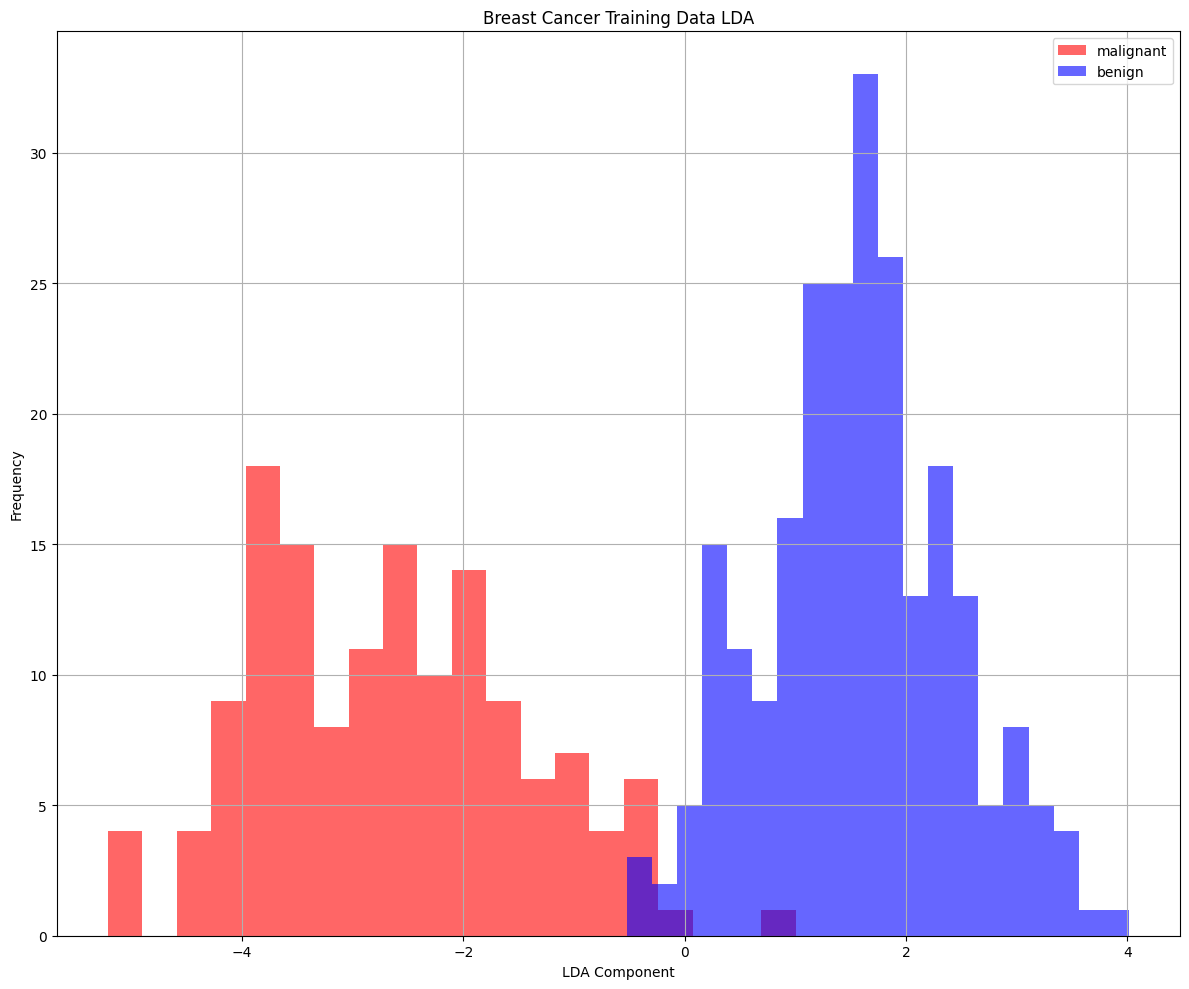

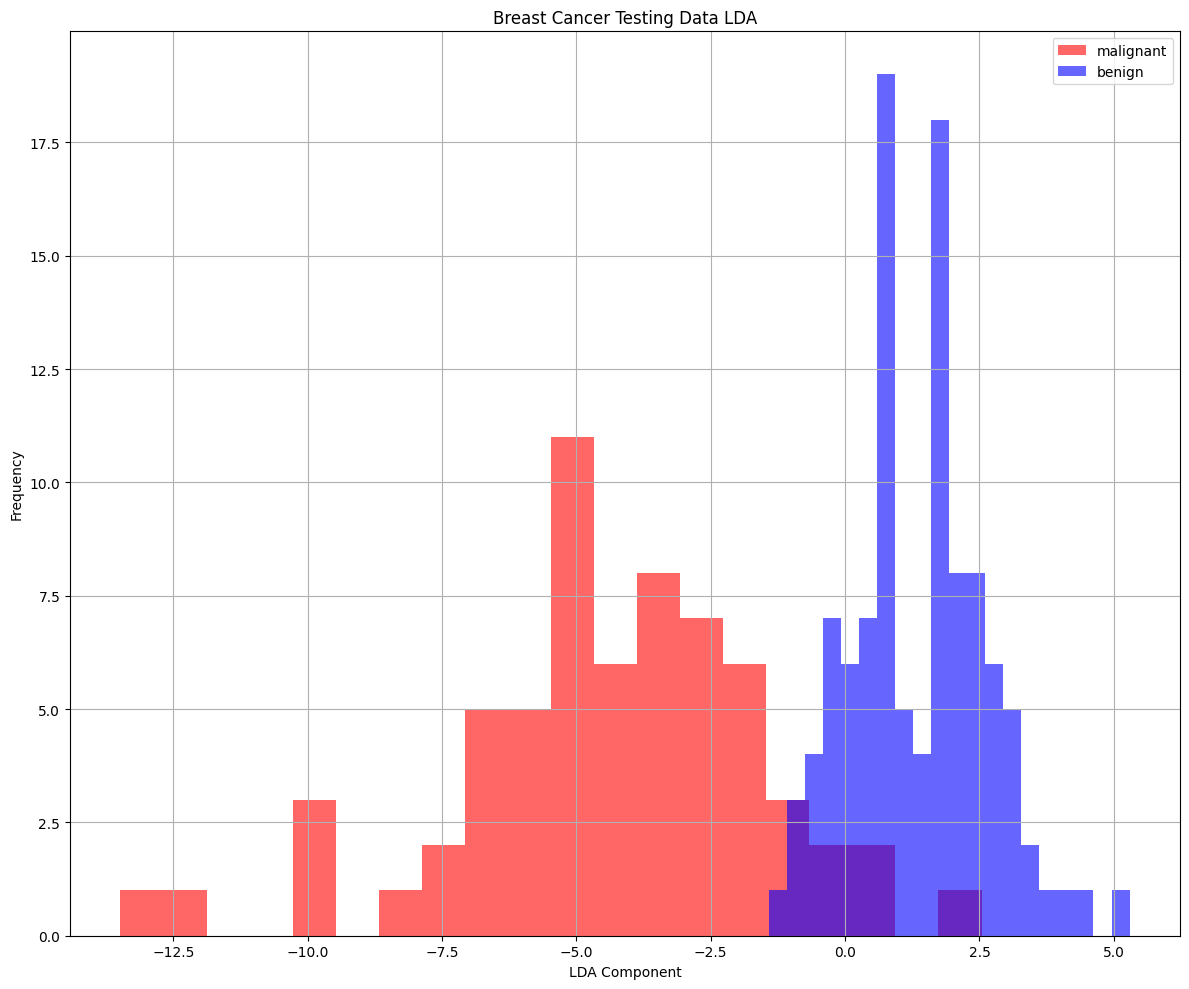

[I 2025-04-27 15:06:34,366] A new study created in memory with name: no-name-843849bf-3a88-4ce2-b3ba-17209ed8fe21
[I 2025-04-27 15:06:47,477] Trial 0 finished with value: 0.9789473684210528 and parameters: {'n_estimators': 2978, 'max_depth': 6, 'learning_rate': 0.0018515206505126918, 'subsample': 0.8350031701853983, 'colsample_bytree': 0.8865077406355599, 'gamma': 0.28625628024420646, 'reg_alpha': 0.014117031988363513, 'reg_lambda': 0.0007749388098909086}. Best is trial 0 with value: 0.9789473684210528.
[I 2025-04-27 15:06:51,392] Trial 1 finished with value: 0.9842105263157894 and parameters: {'n_estimators': 1612, 'max_depth': 10, 'learning_rate': 0.01297176937894675, 'subsample': 0.8785498208948792, 'colsample_bytree': 0.6926444030916405, 'gamma': 4.319797584881926, 'reg_alpha': 1.4751034038422564e-05, 'reg_lambda': 3.430063083662843e-07}. Best is trial 1 with value: 0.9842105263157894.
[I 2025-04-27 15:07:02,605] Trial 2 finished with value: 0.9815789473684211 and parameters: {'n_e

Best trial:
Accuracy: 0.9868421052631579
Best hyperparameters:  {'n_estimators': 7823, 'max_depth': 3, 'learning_rate': 0.004786395511773162, 'subsample': 0.6373236085342552, 'colsample_bytree': 0.6888499213396426, 'gamma': 4.124441657638287, 'reg_alpha': 0.0004344649356843862, 'reg_lambda': 1.7285468127698526e-06}


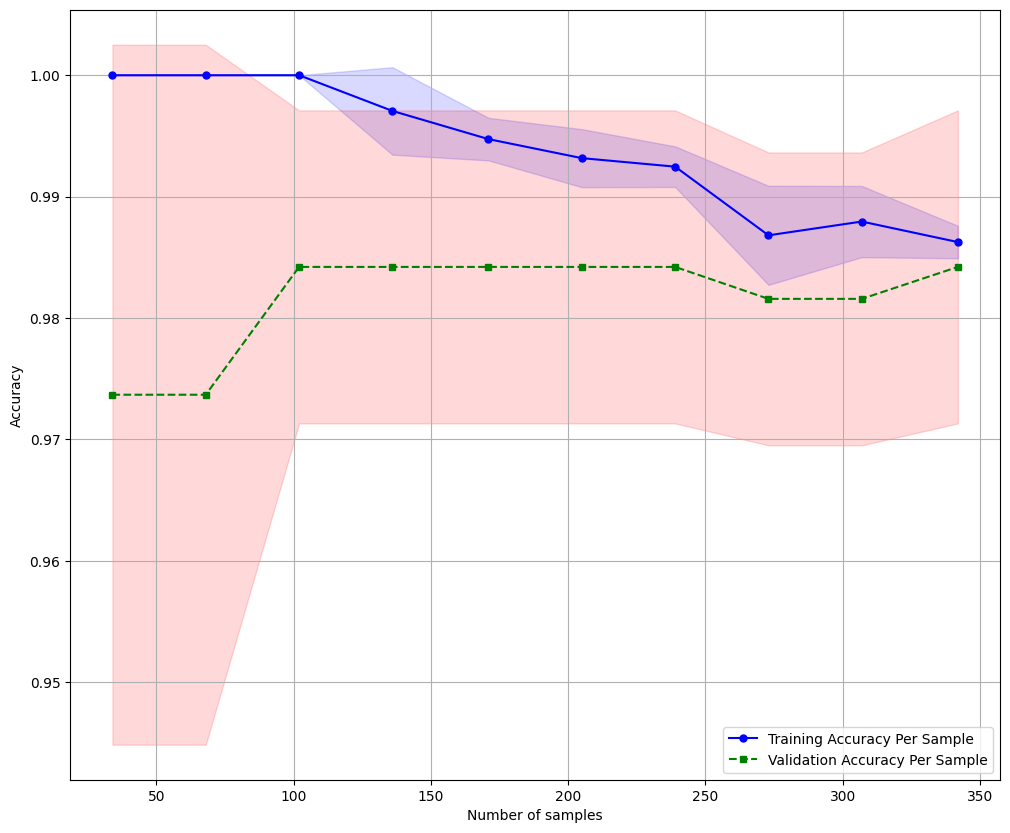

Confusion Matrix
[[60  4]
 [10 97]]
Accuracy: 0.9181, Precision: 0.9604, Recall: 0.9065, F1: 0.9327, AUC: 0.9547


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)